<a href="https://colab.research.google.com/github/laksh262001/Deeplearning-and-AI/blob/main/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
# Load data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [3]:
# Build the model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [4]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2984 - accuracy: 0.9135 - val_loss: 0.1375 - val_accuracy: 0.9601
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1430 - accuracy: 0.9581 - val_loss: 0.1012 - val_accuracy: 0.9681
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1097 - accuracy: 0.9669 - val_loss: 0.0835 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0878 - accuracy: 0.9725 - val_loss: 0.0773 - val_accuracy: 0.9768
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0775 - accuracy: 0.9752 - val_loss: 0.0730 - val_accuracy: 0.9778
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0670 - accuracy: 0.9789 - val_loss: 0.0789 - val_accuracy: 0.9757
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0597 - accuracy: 0.9807 - val_loss: 0.0812 - val_accuracy:

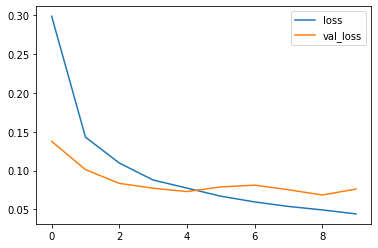

In [6]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

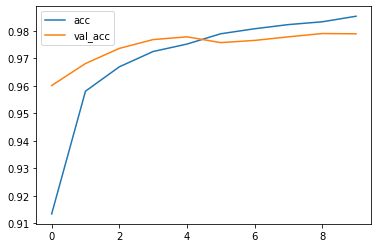

In [7]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [8]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0762 - accuracy: 0.9789
[0.07617830485105515, 0.9789000153541565]


Confusion matrix, without normalization
[[ 969    0    1    1    1    2    3    1    2    0]
 [   0 1125    2    1    0    2    2    1    2    0]
 [   7    3  995    5    5    1    3    9    4    0]
 [   0    0    4  992    1    3    0    7    2    1]
 [   0    0    1    0  966    1    5    3    0    6]
 [   3    0    0    9    1  872    2    1    3    1]
 [   5    3    1    1    8    6  932    0    2    0]
 [   2    1    7    3    0    0    0 1011    0    4]
 [   2    0    1    7    4    1    0    6  950    3]
 [   2    3    0    5   14    3    0    5    0  977]]


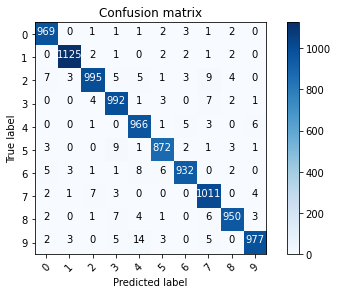

In [16]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  '''
  This  function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalization=True'.
  '''
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt), 
            horizontalalignment='center',
            color='white' if cm[i, j] > thresh else 'black')
    
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))


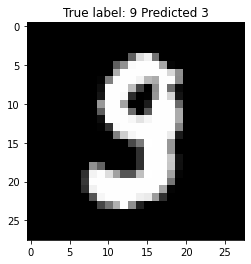

In [27]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s Predicted %s' %(y_test[i], p_test[i]));